# Audio Processing Testing Notebook
This notebook contains code used to test various audio processing algorithms and debug the audio processing on the board.

In [17]:
%matplotlib widget

import serial.tools.list_ports as port_list
from serial import Serial
import matplotlib.pyplot as plt
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
import scipy.io.wavfile
import struct

In [18]:
if 'ser' in locals() and ser is not None and not ser.closed:
    ser.close()

In [19]:
ports = list(port_list.comports())
for p in ports:
    print (p)

if 'ser' in locals() and ser is not None and not ser.closed:
    ser.close()

ser = Serial('COM3', 115200)

COM3 - USB Serial Port (COM3)


In [100]:
transfer_size = 32000
chunk_size = 128
bytes_per_sample = 4

def read_serial():
    # Empty the buffer before we start
    ser.read_all()

    # Enter the factory menu and trigger a mic read
    print("Sending commands...")
    ser.write("\x1b".encode("ascii"))
    time.sleep(0.5)
    ser.write("b".encode("ascii"))
    time.sleep(0.5)
    ser.write("0".encode("ascii"))

    print("Waiting for response...")
    time.sleep(0.5)
    i = 0
    start_time = time.time()
    expected_response = b"Transmission starting in 3 seconds.\r\n"
    while True:
        b = ser.read()
        print(chr(b[0]) if chr(b[0]).isprintable() else f"\{int(b[0])}#", end="")
        if b[0] == expected_response[i]:
            i += 1
        if i == len(expected_response):
            break
        if time.time() - start_time > 3:
            print("\nERROR: Didn't receive expected response within 3 seconds!")
            return []
    # print(ser.read_all())
    print("\nBeginning read...")
    time.sleep(2)

    data = []
    for i in range(transfer_size//chunk_size):
        buff = ser.read(chunk_size)
        print(f"Receiving: {i/(transfer_size//chunk_size)*100:.2f}%", end="\r")
        # dt = np.dtype(np.int16)
        # dt = dt.newbyteorder('>')
        # data = np.frombuffer(buff, dtype=dt)
        data.extend(buff)#struct.unpack(f"<{chunk_size//bytes_per_sample}i", buff))

    return data

data = read_serial()

Sending commands...
Waiting for response...
\0#Ò\127#\0#\141#\0#\0#\0#\0#Ö\127#\0#\5#\0#\0#\0#\0#Ò\127#\0#Ô\0#\0#\0#\0#Õ\127#\0#!\0#\0#\0#\0#Õ\127#\0#g\0#\0#\0#\0#×\127#\0#N\0#\0#\0#\0#Ö\127#\0#\11#\0#\0#\0#\0#Ö\127#\0#Î\0#\0#\0#\0#Ø\127#\0#Í\0#\0#\0#\0#Ú\127#\0#D\0#\0#\0#\0#Ý\127#\0#d\0#\0#\0#\0#Û\127#\0#S\0#\0#\0#\0#Ú\127#\0#ñ\0#\0#\0#\0#Ö\127#\0#\148#\0#\0#\0#\0#Õ\127#\0#g\0#\0#\0#\0#Ò\127#\0#É\0#\0#\0#\0#Ó\127#\0#\20#\0#\0#\0#\0#Õ\127#\0#^\0#\0#\0#\0#Õ\127#\0#¢\0#\0#\0#\0#Ó\127#\0#\148#\0#\0#\0#\0#Õ\127#\0#$\0#\0#\0#\0#Õ\127#\0#¦\0#\0#\0#\0#Ó\127#\0#þ\0#\0#\0#\0#×\127#\0#÷\0#\0#\0#\0#Ø\127#\0#\155#\0#\0#\0#\0#Ú\127#\0#\4#\0#\0#\0#\0#Ú\127#\0#R\0#\0#\0#\0#×\127#\0#e\0#\0#\0#\0#Ö\127#\0#x\0#\0#\0#\0#×\127#\0#©\0#\0#\0#\0#Ù\127#\0#&\0#\0#\0#\0#Ø\127#\0#ø\0#\0#\0#\0#×\127#\0#Ã\0#\0#\0#\0#Ü\127#\0#\16#\0#\0#\0#\0#Ý\127#\0#G\0#\0#\0#\0#Ü\127#\0#Ò\0#\0#\0#\0#Ú\127#\0#º\0#\0#\0#\0#Ø\127#\0#h\0#\0#\0#\0#Ô\127#\0#ð\0#\0#\0#\0#Ó\127#\0#\6#\0#\0#\0#\0#Ó\127#\0#k\0#\0#\0#\0#Ð\127#\0#\134#\0#\0#

In [ ]:
bytearray(data)

In [101]:
data_int = struct.unpack(f">{len(data)//bytes_per_sample}i", bytearray(data))
data_float = [data_int[i]/(1<<31) for i in range(1, len(data_int), 2)]

In [97]:
data_float

[-0.44143676199018955,
 -0.2851867377758026,
 -0.08987416280433536,
 0.06250006426125765,
 0.20312501350417733,
 0.2187500111758709,
 0.12500011688098311,
 -0.027374170254915953,
 -0.2383116539567709,
 -0.4258117377758026,
 -0.5429991972632706,
 -0.5742492438293993,
 -0.519561683293432,
 -0.355499230325222,
 -0.1445616721175611,
 -0.46487425779923797,
 -0.339874186553061,
 -0.21487415628507733,
 -0.09768669912591577,
 -0.01174924848601222,
 -0.019561650697141886,
 -0.12112417351454496,
 -0.27737415954470634,
 -0.44143675127997994,
 -0.5429992424324155,
 -0.5976866534911096,
 -0.5976866693235934,
 -0.5117492447607219,
 -0.4023741725832224,
 -0.2539367564022541,
 -0.128936764318496,
 -0.04299915349110961,
 -0.04299917910248041,
 -0.09768666606396437,
 -0.222686683293432,
 -0.37893675919622183,
 -0.5195617340505123,
 -0.6054991981945932,
 -0.6289367317222059,
 -0.5586242661811411,
 -0.4492492345161736,
 -0.3086242349818349,
 -0.1679992056451738,
 -0.06643671123310924,
 3.166496753692627e-

<ipython-input-102-619c61e42f0e>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


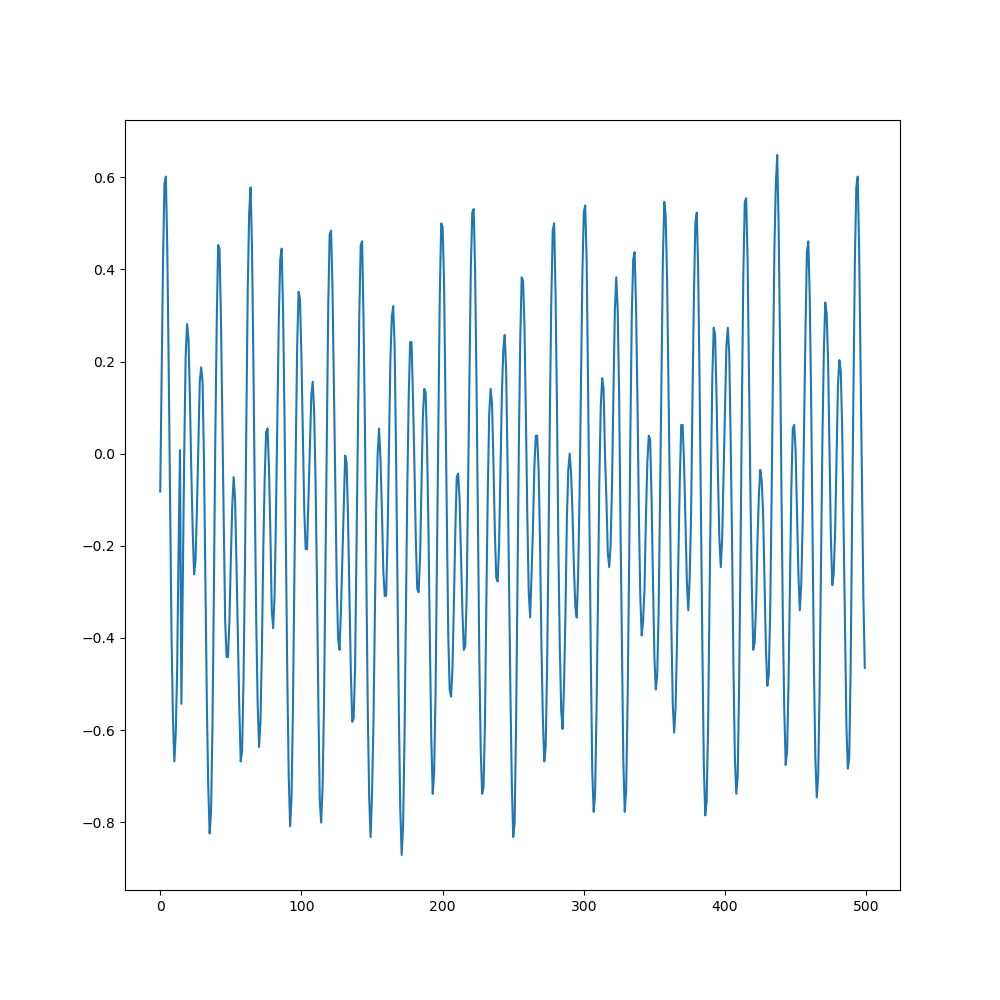

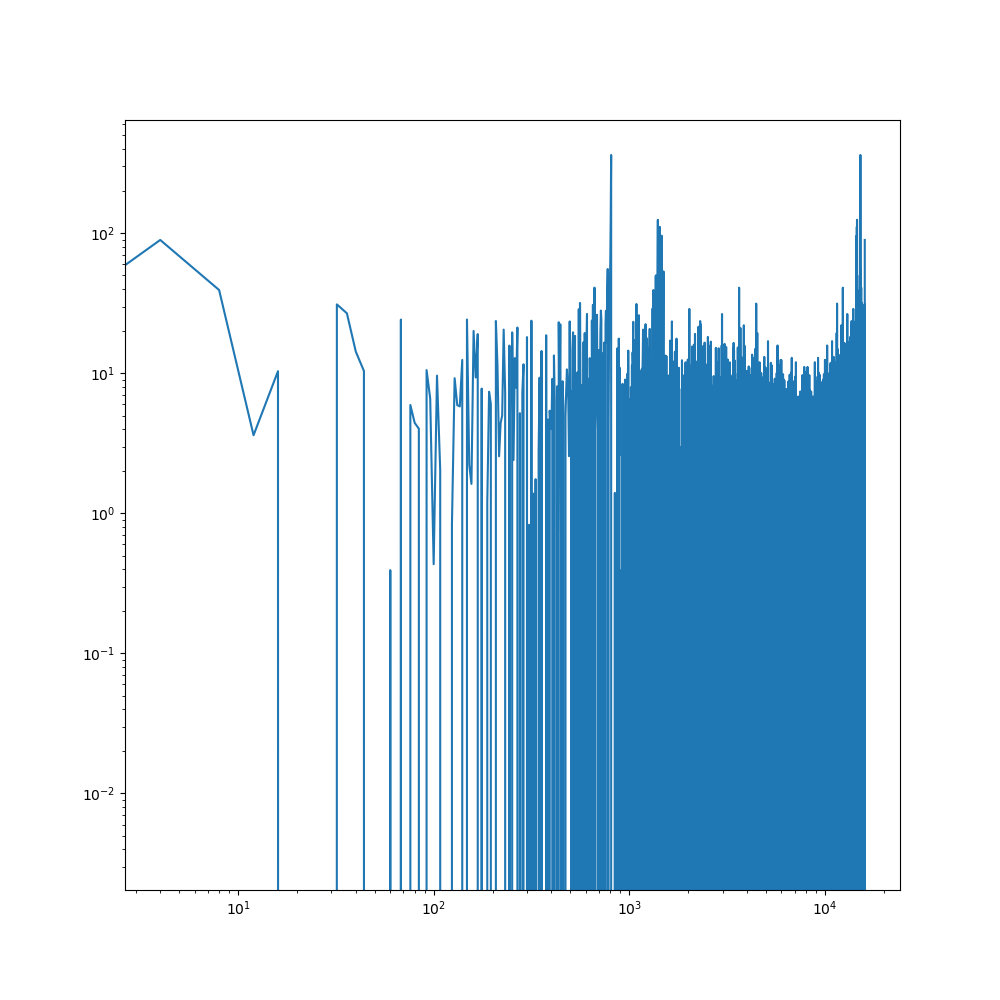

In [102]:
max_samples = 500

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
#ax.set_yscale('log')
ax.plot(range(max_samples), data_float[:max_samples])
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot()
yf = scipy.fftpack.fft(data_float)
xf = np.linspace(0.0, (16000), len(data_float)//1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(xf, yf)

In [99]:
from scipy.io.wavfile import write

write("test.wav", 16000, np.array(data_float))

In [6]:
from oscilloscope import Osc

ser.write("\x1b".encode("ascii"))
time.sleep(0.5)
ser.write("b".encode("ascii"))
time.sleep(0.5)
ser.write("0".encode("ascii"))
time.sleep(0.5)
print(ser.read_all())
print("Beginning read...")
time.sleep(2)

# turn on normalization
osc = Osc(normalize=True)


@osc.signal
def increasing_signal(state):
    delta = 1

    while True:
        buff = ser.read(128)
        data_float = [0*buff[i+1]/(255) + buff[i+1]/(255) for i in range(0, len(buff), 2)]

        for x in data_float:
            state.draw(x)
            delta += 5


osc.start()

AttributeError: module 'cloudpickle.cloudpickle' has no attribute 'dumps'

In [6]:
import matplotlib.pyplot as plt
import scipy
import numpy as np

data = []
with open("sampleddata1.txt") as f:
    data = [int(l) for l in f.readlines()]

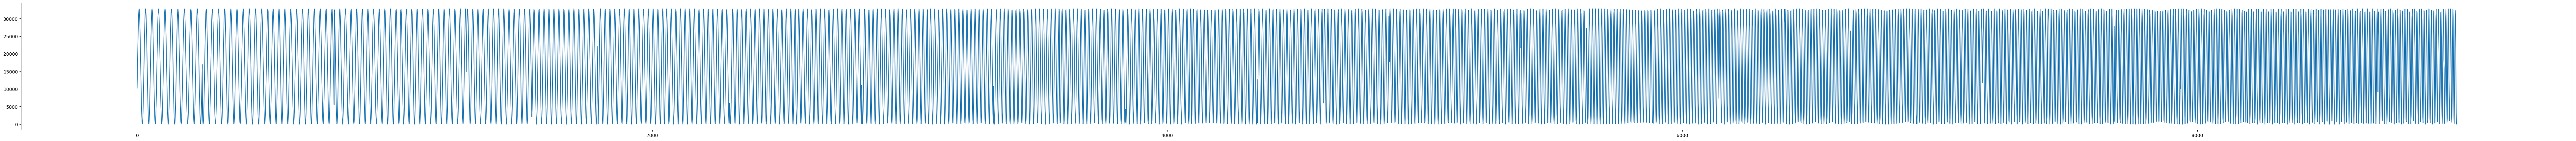

In [7]:
%matplotlib inline

plt.figure(figsize=(100,5))
plt.plot(data)

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


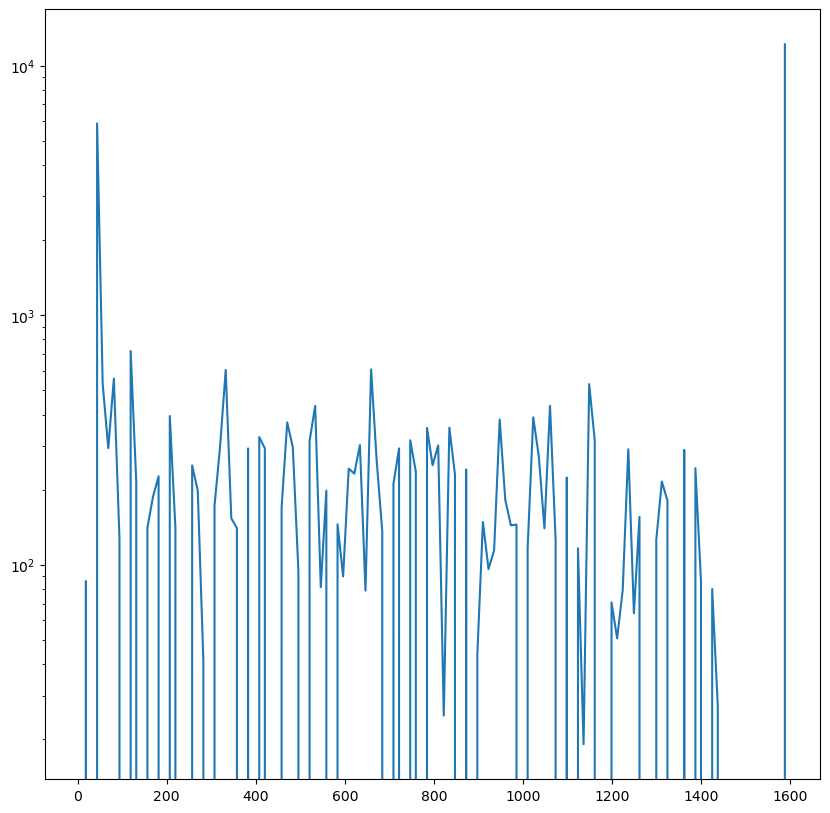

In [15]:
sample_rate = 1600

fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot()
yf = scipy.fftpack.fft(data)
xf = np.linspace(-sample_rate, sample_rate, len(data))
xf = xf[len(xf)//2:-1]
yf = yf[len(yf)//2:-1]
# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.plot(xf, yf)

In [11]:
# Generate a test tone
import math

freq = 2000
sr = 16000
max_val = 1 << 15
min_val = 0

print("""__attribute__((aligned(16)))
uint16_t dbg_buff[256] = 
{""")
for i in range(256):
    print(f"    {math.trunc((math.sin(freq * i / 16000)*0.5+0.5) * (max_val-min_val) - min_val)}, ")
print("};")

__attribute__((aligned(16)))
uint16_t dbg_buff[256] = 
{
    16384, 
    18426, 
    20437, 
    22385, 
    24238, 
    25970, 
    27551, 
    28959, 
    30170, 
    31166, 
    31932, 
    32454, 
    32726, 
    32743, 
    32505, 
    32015, 
    31281, 
    30315, 
    29131, 
    27749, 
    26189, 
    24476, 
    22637, 
    20700, 
    18696, 
    16655, 
    14611, 
    12594, 
    10636, 
    8768, 
    7019, 
    5416, 
    3984, 
    2746, 
    1720, 
    923, 
    368, 
    62, 
    11, 
    216, 
    672, 
    1374, 
    2311, 
    3467, 
    4824, 
    6362, 
    8056, 
    9880, 
    11806, 
    13803, 
    15840, 
    17886, 
    19908, 
    21875, 
    23757, 
    25524, 
    27148, 
    28604, 
    29869, 
    30924, 
    31752, 
    32340, 
    32679, 
    32764, 
    32593, 
    32169, 
    31499, 
    30594, 
    29466, 
    28134, 
    26619, 
    24944, 
    23136, 
    21222, 
    19233, 
    17199, 
    15152, 
    13125, 
    11148, 
    9254, 
    7470, 


In [8]:
#read serial port


import serial
import time
import numpy as np

#read serial byte by byte
# if byte is 0x7E save the following bytes until 0x7E

#print all available com ports
token = [0x7E, 0x00,0x7E]
import serial.tools.list_ports
ports = list(serial.tools.list_ports.comports())
for i,p in enumerate(ports):
    print(i,p)
#choose a port
port = ports[int(input("choose a port: "))]

ser = serial.Serial(port.device, 115200, timeout=1)
ser.flush()
buffer = [0,0,0]
while True:
    buffer.append(ser.read())
    buffer.pop(0)
    if buffer[-1] == b'\x7E' and buffer[-2] == b'\x00' and buffer[-3] == b'\x7E':
        print("found token")
        while True:
            buffer.append(ser.read())
            if buffer[-1] == b'\x7E' and buffer[-2] == b'\x00' and buffer[-3] == b'\x7E':
                print("found token")
                #convert buffer to int
                # with open("mfsc.bin", "wb") as f:
                #     f.write(b"".join(buffer[3:-3]))
                # buffer = [struct.unpack("<f", buffer[])]
                # buffer = [int.from_bytes(b, byteorder='little') for b in buffer]
                # print(buffer[3:-3])
                print(len(buffer[3:-3]))
                break
        break

buffer = buffer[3:-3]

0 COM5 - Silicon Labs CP210x USB to UART Bridge (COM5)
found token
found token
65000


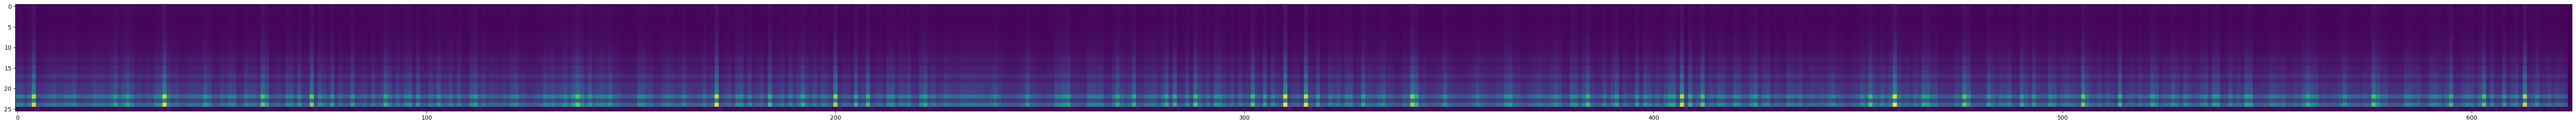

In [9]:
import struct

#every 4 bytes is a float
flat_floats = []
for x in range(0,len(buffer)-1,4):
    #merge 4 bytes into 1 float
    float = struct.unpack("<f", b"".join(buffer[x:x+4]))[0]
    flat_floats.append(float)

array = np.array(flat_floats).reshape(625,26).swapaxes(0, 1)[::-1,:]

# Display as mfsc
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(80,80))
plt.imshow(array, interpolation="none")
plt.show()

(609, 26)


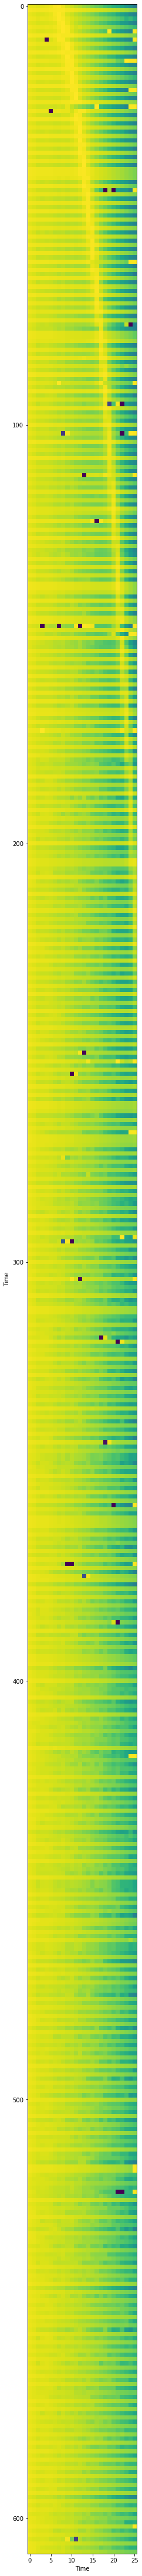

In [17]:
import numpy as np

data = []
window = None
with open("mfsc_sine3.txt", "r") as f:
    for l in f.readlines():
        if window != None:
            try:
                f = float(l)
                # There are bugs with the serial logging which cause numbers to be incorrectly logged, this filters some of the outliers out
                f = max(min(f, 10), -1000)
                window.append(f)
            except:
                pass
        if l.strip() == "[INFO] FFT Start":
            window = []
        if l.strip() == "[INFO] FFT End":
            if window != None:
                # print(len(window))
                for i in range(len(window), 26):
                    window.append(0)
                data.append(np.array(window)[:26])

data = np.array(data)
print(data.shape)

import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(80,80))
plt.imshow(data, interpolation="none")
plt.xlabel("Time")
plt.ylabel("Time")
plt.show()